<h1>Лабораторная работа №1</h1> 

В данной лабораторной работе исследуется изменение точности модели машинного обучения **RandomForestClassifier** за счет удаления наиболее коррелированных признаков.

Импортируем необходимые библиотеки и запишем данные в dataframe:

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

import os, sys
path = os.path.abspath("C:/Users/maria/Downloads")


import zipfile as zf
files = zf.ZipFile(f"{path}/data.zip",'r') # путь до архива с набором данных
files.extractall(f"{path}") # путь до текущего файла
files.close()

train = pd.read_csv(f"{path}/train.csv", engine='python')
test = pd.read_csv(f"{path}/test.csv", engine='python')

df = train.copy()
df1 = test.copy()

In [2]:
df
df1

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


Оставим только те строки, где указаны протоколы TCP/UDP:

In [3]:
df_cleaned=df[df['proto'].isin(['tcp', 'udp'])]
df_cleaned1=df1[df1['proto'].isin(['tcp', 'udp'])]

df_cleaned
df_cleaned1

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82325,82326,0.000010,udp,-,INT,2,0,104,0,100000.002500,...,1,2,0,0,0,1,2,0,Normal,0
82326,82327,0.000009,udp,-,INT,2,0,104,0,111111.107200,...,1,1,0,0,0,1,1,0,Normal,0
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0


Закодируем протколы в соотвествии с "List of Protocol IP Numbers" (https://en.wikipedia.org/wiki/List_of_IP_protocol_numbers), используя Protocol и Protocol Numbers:

In [4]:
ProtocolNumbers = {"proto":     {"tcp": 6, "udp": 17}}
df_cleaned=df_cleaned.replace(ProtocolNumbers)
df_cleaned1=df_cleaned1.replace(ProtocolNumbers)
df_cleaned
df_cleaned1

C:\Users\maria\AppData\Local\Temp\ipykernel_6308\202590187.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned=df_cleaned.replace(ProtocolNumbers)
C:\Users\maria\AppData\Local\Temp\ipykernel_6308\202590187.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned1=df_cleaned1.replace(ProtocolNumbers)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,17,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,17,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,17,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,17,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,17,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82325,82326,0.000010,17,-,INT,2,0,104,0,100000.002500,...,1,2,0,0,0,1,2,0,Normal,0
82326,82327,0.000009,17,-,INT,2,0,104,0,111111.107200,...,1,1,0,0,0,1,1,0,Normal,0
82327,82328,0.000005,17,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,6,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0


Оставим только числовые строки и удалим "id":

In [5]:
df_cleaned=df_cleaned.select_dtypes(['number'])
df_cleaned=df_cleaned.drop(columns=['id'])

df_cleaned1=df_cleaned1.select_dtypes(['number'])
df_cleaned1=df_cleaned1.drop(columns=['id'])
df_cleaned
df_cleaned1

,dur,proto,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.000011,17,2,0,496,0,90909.090200,254,0,1.803636e+08,...,1,1,2,0,0,0,1,2,0,0
1,0.000008,17,2,0,1762,0,125000.000300,254,0,8.810000e+08,...,1,1,2,0,0,0,1,2,0,0
2,0.000005,17,2,0,1068,0,200000.005100,254,0,8.544000e+08,...,1,1,3,0,0,0,1,3,0,0
3,0.000006,17,2,0,900,0,166666.660800,254,0,6.000000e+08,...,2,1,3,0,0,0,2,3,0,0
4,0.000010,17,2,0,2126,0,100000.002500,254,0,8.504000e+08,...,2,1,3,0,0,0,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82325,0.000010,17,2,0,104,0,100000.002500,254,0,4.160000e+07,...,1,1,2,0,0,0,1,2,0,0
82326,0.000009,17,2,0,104,0,111111.107200,254,0,4.622222e+07,...,1,1,1,0,0,0,1,1,0,0
82327,0.000005,17,2,0,104,0,200000.005100,254,0,8.320000e+07,...,1,1,2,0,0,0,2,1,0,0
82328,1.106101,6,20,8,18062,354,24.410067,254,252,1.241044e+05,...,1,1,1,0,0,0,3,2,0,0


Построим график распределения классов согласно "label" ТРЕНИРОВОЧНЫЙ НАБОР:

Распределение классов:
label
1    0.629663
0    0.370337
Name: count, dtype: float64


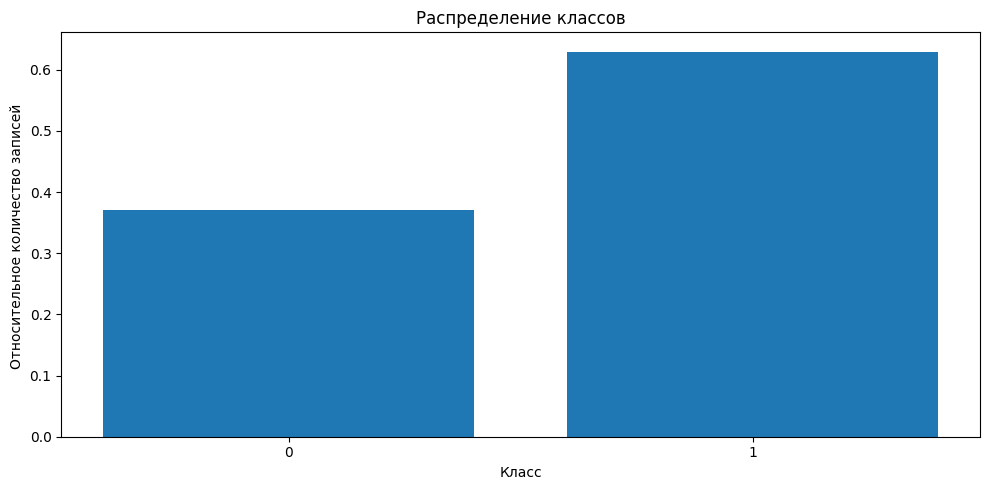

In [8]:
import matplotlib.pyplot as plt

# Подсчет количества экземпляров каждого класса
class_counts = df_cleaned['label'].value_counts()

class_distribution = class_counts/len(df_cleaned)

# Построение графика
plt.figure(figsize=(10, 5))
plt.bar(class_counts.index, class_distribution)
plt.xlabel('Класс')
plt.ylabel('Относительное количество записей ')
plt.title('Распределение классов')
plt.xticks(class_counts.index)
plt.tight_layout()

# Вывод числовых значений распределения
print("Распределение классов:")
print(class_distribution)

plt.show()

Построим график распределения классов согласно "label" ТЕСТОВЫЙ НАБОР:

Распределение классов:
label
1    0.504296
0    0.495704
Name: count, dtype: float64


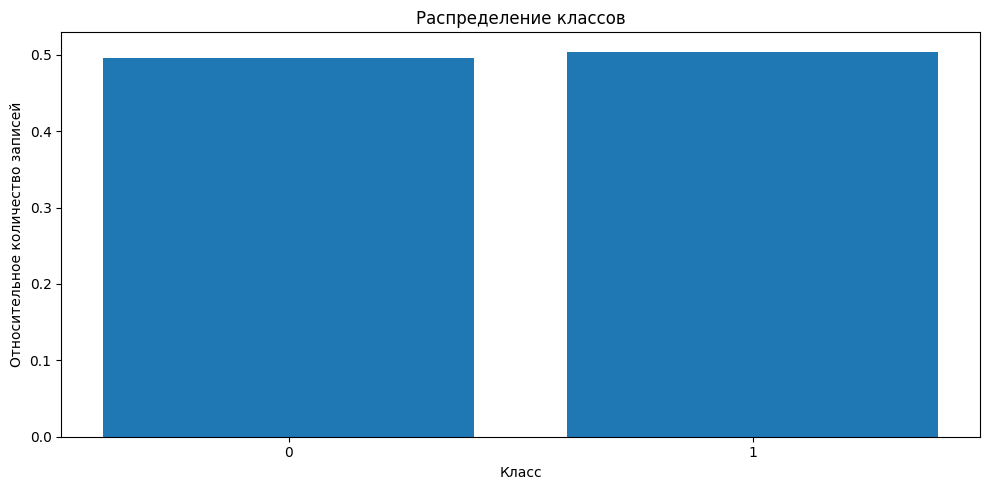

In [9]:
class_counts1 = df_cleaned1['label'].value_counts()

class_distribution1 = class_counts1/len(df_cleaned1)

# Построение графика
plt.figure(figsize=(10, 5))
plt.bar(class_counts1.index, class_distribution1)
plt.xlabel('Класс')
plt.ylabel('Относительное количество записей')
plt.title('Распределение классов')
plt.xticks(class_counts1.index)
plt.tight_layout()

# Вывод числовых значений распределения
print("Распределение классов:")
print(class_distribution1)

plt.show()

Создадим модель и вычислим абсолютную среднюю ошибку, accuracy и precision

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
import numpy as np

SEED=42
X_train = df_cleaned.drop(['label'], axis = 1)
y_train = df_cleaned['label']
X_test = df_cleaned1.drop(['label'], axis = 1)
y_test= df_cleaned1['label']

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
mae = np.sum( np.abs( y_test - y_pred ) ) / np.size( y_test )
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') 

print(f"Mae: {mae}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")

Mae: 0.14583591907657936
Precision: 0.8789452856001664
Accuracy: 0.8541640809234207


Теперь построим график фажности признаков (признаки сортируются в порядке убывания):

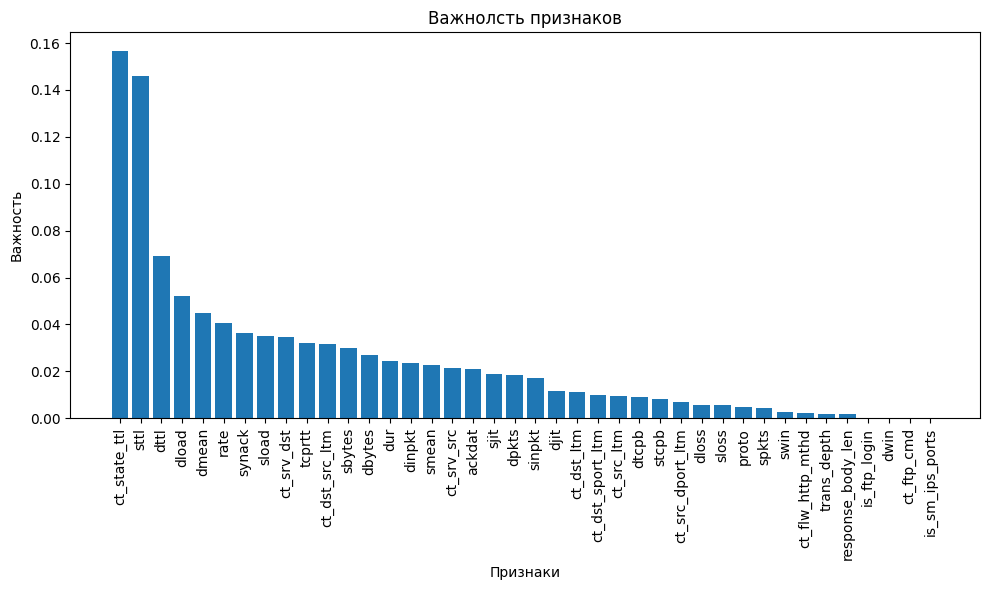

In [28]:
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names=X_train.columns

plt.figure(figsize=(10, 6))  
plt.title("Важность признаков")
plt.bar(range(len(indices)), importances[indices], align='center')
plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Признаки")
plt.ylabel("Важность")
plt.tight_layout() 
plt.show()

Выделим 5 наиболее важных признаков:

In [30]:
arr=[]
[arr.append(feature_names[i]) for i in indices]
print(arr[:5])

['ct_state_ttl', 'sttl', 'dttl', 'dload', 'dmean']


Для того, чтобы выявить наиболее коррелированные признаки, построим корреляционную матрицу. Это позволит определить признаки, несущие очень похожую информацию (таковыми будем считать признаки с коэффициентом корреляции >=0.75), и вскоре убрать их из рассмотрения, чтобы повысить точность модели:

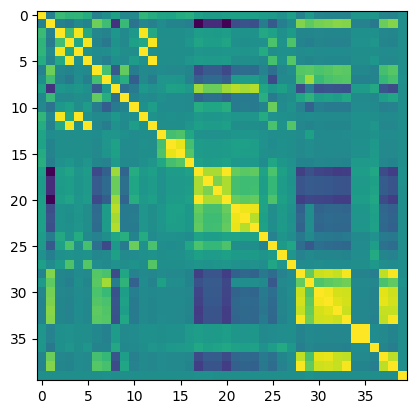

In [31]:
corr_matrix2=X_train.corr()
plt.imshow(corr_matrix2)

In [32]:
correlated2 = []
for i in range(len(corr_matrix2.columns)):
    for j in range(i):
        if abs(corr_matrix2.iloc[i, j]) >= 0.75:
            correlated2.append((corr_matrix2.columns[i], corr_matrix2.columns[j], corr_matrix2.iloc[i, j]))

if correlated2:
  print("\nНаиболее коррелированные пары признаков:")
  for feature1, feature2, corr_coef in correlated2:
        print(f"Признак 1 : {feature1}, признак 2: {feature2}, коэффициент корреляции: {corr_coef:.2f}")
else:
  print("\nОтсутствуют достаточно коррелированные признаки")


Наиболее коррелированные пары признаков:
Признак 1 : sbytes, признак 2: spkts, коэффициент корреляции: 0.96
Признак 1 : dbytes, признак 2: dpkts, коэффициент корреляции: 0.97
Признак 1 : sloss, признак 2: spkts, коэффициент корреляции: 0.97
Признак 1 : sloss, признак 2: sbytes, коэффициент корреляции: 1.00
Признак 1 : dloss, признак 2: dpkts, коэффициент корреляции: 0.98
Признак 1 : dloss, признак 2: dbytes, коэффициент корреляции: 1.00
Признак 1 : sjit, признак 2: dinpkt, коэффициент корреляции: 0.93
Признак 1 : swin, признак 2: proto, коэффициент корреляции: -1.00
Признак 1 : dwin, признак 2: proto, коэффициент корреляции: -0.99
Признак 1 : dwin, признак 2: swin, коэффициент корреляции: 0.99
Признак 1 : dwin, признак 2: stcpb, коэффициент корреляции: 0.76
Признак 1 : dwin, признак 2: dtcpb, коэффициент корреляции: 0.76
Признак 1 : tcprtt, признак 2: dttl, коэффициент корреляции: 0.79
Признак 1 : synack, признак 2: tcprtt, коэффициент корреляции: 0.95
Признак 1 : ackdat, признак 2: d

Когда среди признаков есть сильно корелированные, модели сложно определить, какой именно из признаков вносит такой вклад. Из-за этого ухудшается точность прогноза. 
Чтобы избежать этого, удалим сильно корелированные признаки

In [33]:
features_to_remove=[]
if correlated2:
  for feature1, feature2, corr_coef in correlated2:
        features_to_remove.append(feature1)

X_train_new = X_train.drop(columns=list(features_to_remove))
print(X_train_new)

             dur  proto  spkts  dpkts           rate  sttl  dttl  \
0       0.121478      6      6      4      74.087490   252   254   
1       0.649902      6     14     38      78.473372    62   252   
2       1.623129      6      8     16      14.170161    62   252   
3       1.681642      6     12     12      13.677108    62   252   
4       0.449454      6     10      6      33.373826   254   252   
...          ...    ...    ...    ...            ...   ...   ...   
175336  0.000009     17      2      0  111111.107200   254     0   
175337  0.505762      6     10      8      33.612649   254   252   
175338  0.000009     17      2      0  111111.107200   254     0   
175339  0.000009     17      2      0  111111.107200   254     0   
175340  0.000009     17      2      0  111111.107200   254     0   

               sload          dload      sinpkt  ...       dtcpb  smean  \
0       1.415894e+04    8495.365234   24.295600  ...  2202533631     43   
1       8.395112e+03  503571.3125

Создадим новую модель и проверим её метрики

In [34]:
rfc2 = RandomForestClassifier(n_estimators=100)
rfc2.fit(X_train_new, y_train)
y_pred = rfc.predict(X_test)
mae = np.sum( np.abs( y_test - y_pred ) ) / np.size( y_test )
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') 

print(f"Mae: {mae}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")

Mae: 0.14583591907657936
Precision: 0.8789452856001664
Accuracy: 0.8541640809234207


Для новой модели тоже выведем 5 наиболее важных признаков:

In [35]:
importances2 = rfc2.feature_importances_
indices2 = np.argsort(importances2)[::-1]
feature_names=X_train_new.columns

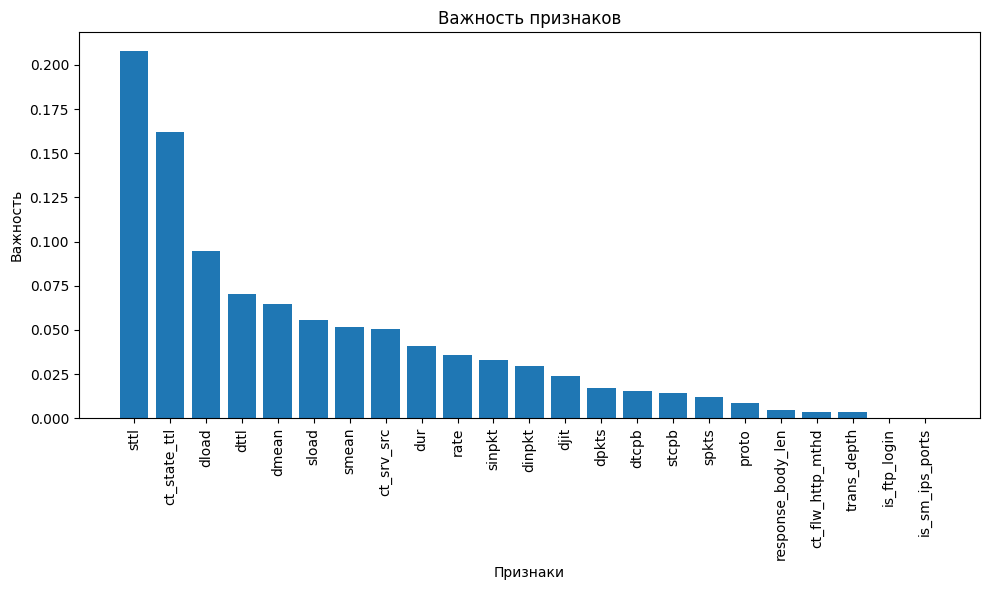

In [36]:
plt.figure(figsize=(10, 6)) 
plt.title("Важность признаков")
plt.bar(range(len(indices2)), importances2[indices2], align='center')
plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices2], rotation=90)
plt.xlabel("Признаки")
plt.ylabel("Важность")
plt.tight_layout() 
plt.show()

Вывод: можно заметить, что модель типа RandomForestClassifier не изменила метрики после удаления сильно коррелированных признаков, что указывает на  устойчивость её предсказаний по таким данным. Важность тех же признаков возросла, что видно из графика.